#1.Introduction, objective and data description

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

- **Let us start by importing the required libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#2.Data overview

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations**:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

**Observations**: The dataset contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**: This dataset comprises 5 numerical variables and 4 categorical variables, with the following data types:

- 4 variables are of type int64.
- 4 variables are of type object.
- 1 variable is of type float64.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Write your code here
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations**: There are no missing values present in any of the 9 columns, indicating that all features contain complete data..


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Observations**:
We will talk about insights from this data:
1. **Cost of Orders**:
   - The average cost of an order is approximately $16.50$.
   - The standard deviation of the cost of orders is around $7.48$.
   - The minimum cost of an order is $4.47$, and the maximum cost is $35.41$.
   - The cost of orders ranges from $4.47$ to $35.41$, with 25% of orders costing less than $12.08$, 50% costing less than $14.14$, and 75% costing less than $22.30$.

2. **Food Preparation and Delivery Times**:
   - The average food preparation time is approximately 27.37 minutes, with a standard deviation of approximately 4.63 minutes.
   - The average delivery time is around 24.16 minutes, with a standard deviation of about 4.97 minutes.
   - The minimum food preparation time is 20 minutes, and the maximum is 35 minutes.
   - The minimum delivery time is 15 minutes, and the maximum is 33 minutes.
   - 25% of orders have a food preparation time of less than 23 minutes, 50% have a time of less than 27 minutes, and 75% have a time of less than 31 minutes.
   - 25% of orders have a delivery time of less than 20 minutes, 50% have a time of less than 25 minutes, and 75% have a time of less than 28 minutes.


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**Observations**: There are 736 orders that have not been rated.


#3.Exploratory Data Analysis (EDA)

##3.1.Univariate Analysis

###3.1.1.Customer_id

In [ ]:
# Total number of unique customers
print('Number of unique ID in the customer_id column is', df['customer_id'].nunique())

Number of unique ID in the customer_id column is 1200


Out of the total 1898 orders mentioned earlier, they were placed by 1200 different consumers.

###3.1.2Restaurant name

In [ ]:
# Total number of unique restaurant names
print('Number of unique names in the restaurant_name column is', df['restaurant_name'].nunique())

Number of unique names in the restaurant_name column is 178


There are 178 unique restaurant names overall.

###3.1.3Cuisine type

In [ ]:
# Total number of cuisine in all restaurants
print('Number of unique values in the cuisine_type column is', df['cuisine_type'].nunique())

Number of unique values in the cuisine_type column is 14


There are 14 unique cuisines within 178 restaurants overall.

In [ ]:
# Top 3 cuisine types on all restautants
# Finding top five cuisine types
df['cuisine_type'].value_counts().head(3)

American    584
Japanese    470
Italian     298
Name: cuisine_type, dtype: int64

The top 5 cuisines are as follows:

1. American: 584 orders
2. Japanese: 470 orders
3. Italian: 298 orders


###3.1.4.histograms for numerical variables distribution

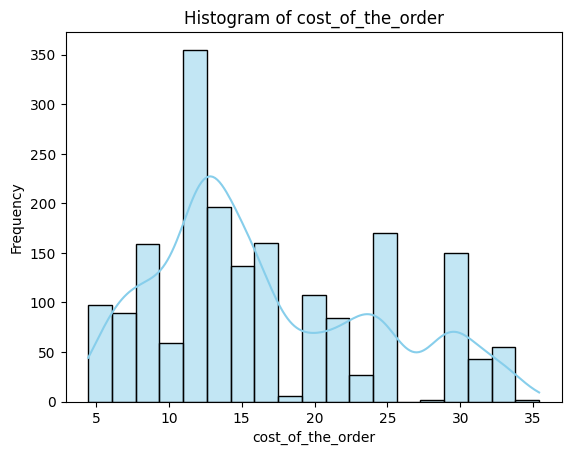

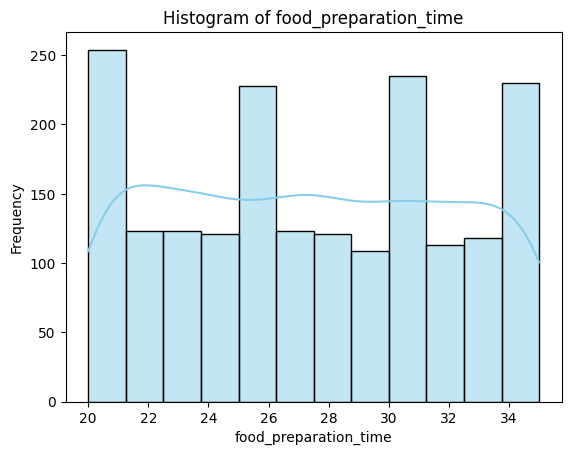

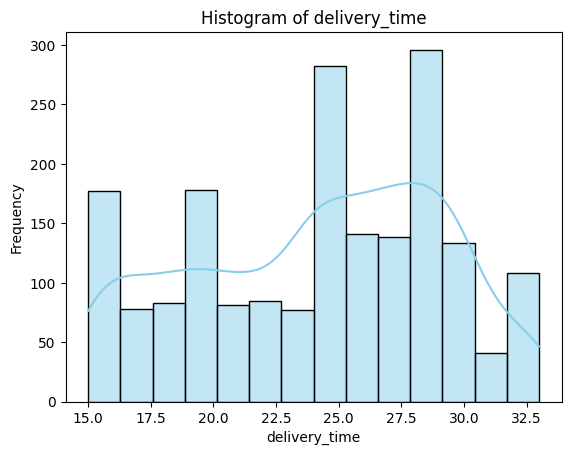

In [ ]:
# Write the code here
# Plotting histograms for numerical variables distribution study
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for var in numerical_vars:
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Observations:

**Cost of the Order:** The distribution of the cost of orders is right-skewed, indicating that the majority of orders fall within the lower price range.

**Food Preparation Time:** The distribution of food preparation times appears to be somewhat uniform, with slight peaks.

**Delivery Time:** The distribution of delivery times reflects a somewhat skewed distribution, with a peak indicating a common delivery time range for most orders.

###3.1.5.boxplots for numerical variables to check oulliers

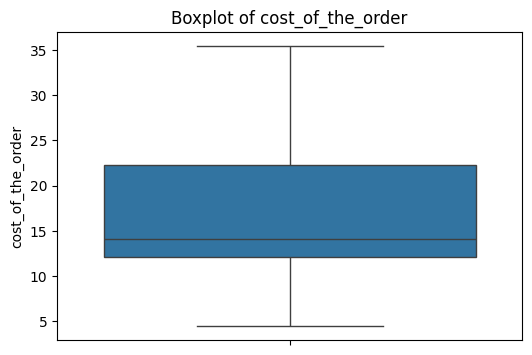

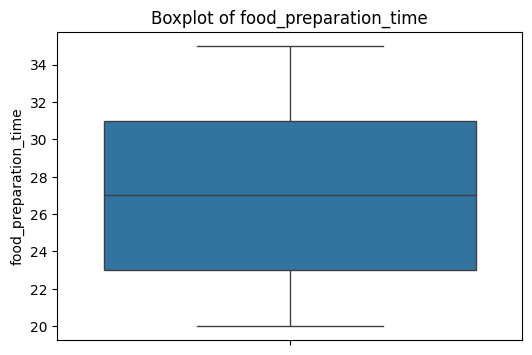

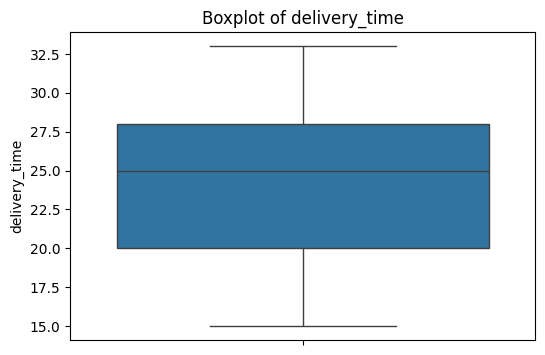

In [ ]:
  # Plot boxplots for numerical variables to check oulliers presence
for var in numerical_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    plt.show()

**Observations**:

*Cost of the Order:* The median is lower, indicating that most orders are less expensive, with a concentration of orders in the lower price range.

*Food Preparation Time:* There is an even distribution of preparation times, with a centrally placed median and few outliers, indicating that preparation times are generally predictable.

*Delivery Time:* Most deliveries tend to occur within a typical timeframe, as shown by the common middle value (median) and the range covering the middle 50% of times (IQR). The existence of shorter or longer delivery times indicates variability.

###3.1.6.countplot for three categorical variables

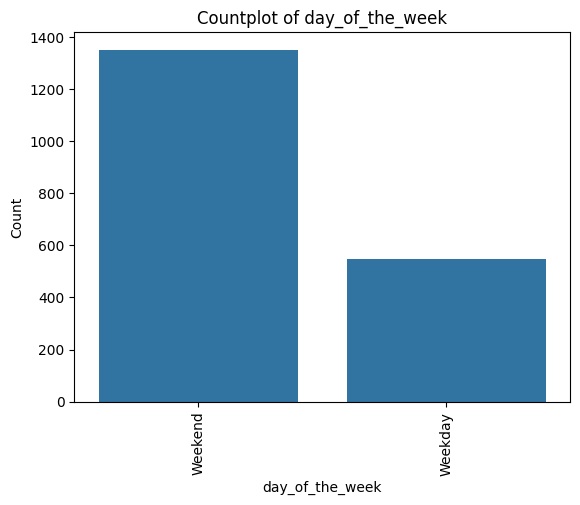

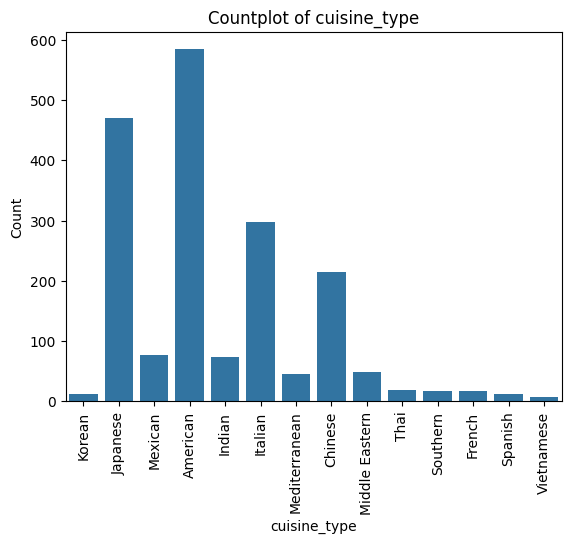

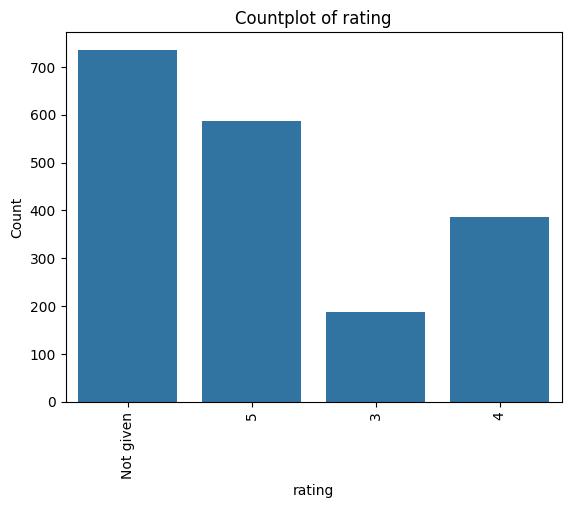

In [ ]:
# Plot countplot for three categorical variables below
categorical_vars = ['day_of_the_week', 'cuisine_type','rating']
for var in categorical_vars:
    sns.countplot(data=df, x=var)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

**Observation:**

* **Day of the Week:** Orders tend to vary between weekdays and weekends, indicating distinct ordering patterns, with 1300 orders placed on weekends compared to around 550 during weekdays.

* **Cuisine Type:** Certain cuisines are markedly more popular, reflecting strong customer preferences for specific food types among the 14 unique cuisines in the dataset, which are not equally distributed. American is the most popular, followed by Japanese and Italian, while Vietnamese appears to be the least popular.

* **Rating:** The highest rating category is 'not given', with over 700 ratings, followed by 5, and 3 is the lowest with 200 ratings.

##3.2Multivariate Analysis

###3.2.1.Delivery Time and Cost of the Order

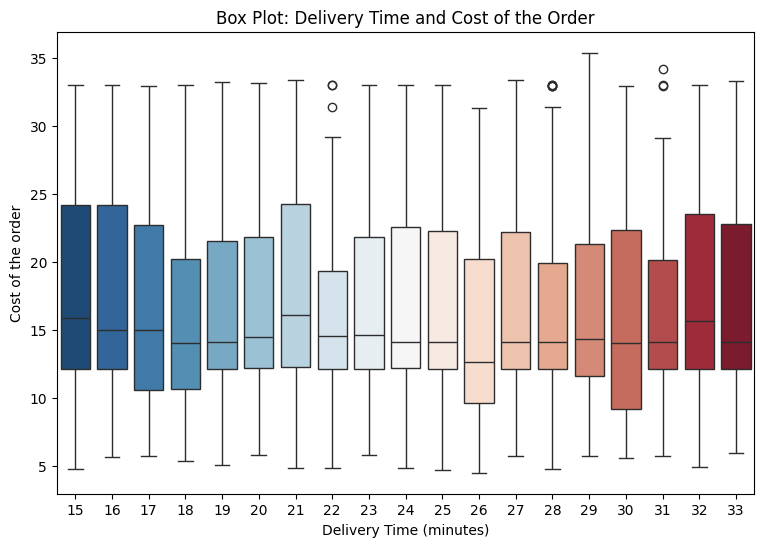

In [ ]:
# Write the code here
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='delivery_time', y='cost_of_the_order', palette = 'RdBu_r')
plt.title('Box Plot: Delivery Time and Cost of the Order')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cost of the order')
plt.show()

Observation:

The box plots reflect a consistent spread in delivery times and costs without any extreme values that are outside of a typical range.

###3.2.2.Top resturants in terms of Revenue

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14).reset_index()

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


###3.2.3.Day of the Week with Cuisine Type

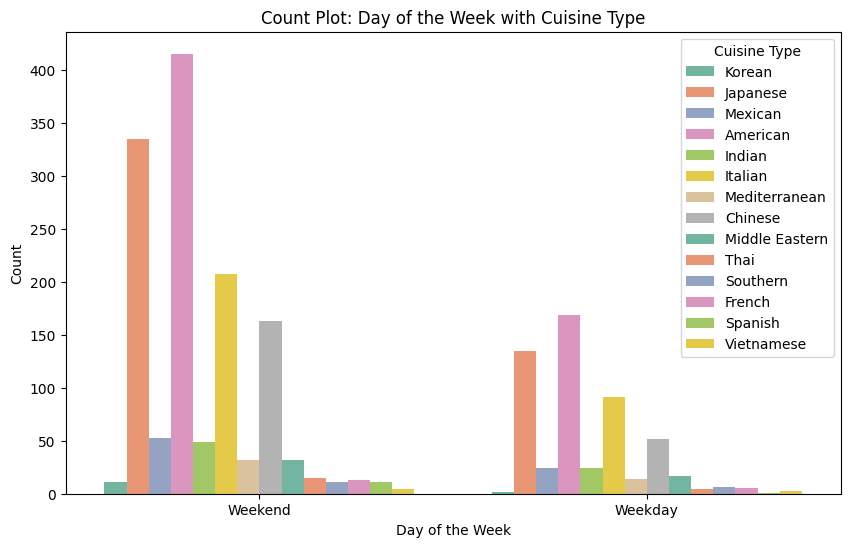

In [ ]:
# Write the code here
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type', palette='Set2')
plt.title('Count Plot: Day of the Week with Cuisine Type')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Cuisine Type')
plt.show()

Observation:
The plot reflects a significant increase in overall orders and slight variance in preference for cuisine types across weekdays and weekends. Some cuisines are more popular on certain days, indicating how dining choices fluctuate based on the day of the week. For example:

- American, Japanese, Italian, Chinese, and Mexican are the top 5 popular cuisines on both weekends and weekdays.
- A significant portion of the total orders is attributed to American and Japanese cuisines on both weekdays and weekends.
- Italian and Mexican cuisines are chosen across the week, showing broad appeal.
- Mexican cuisine attracts a high number of clients on weekends, highlighting its popularity.

###3.2.4.Average Delivery Time - Weenday vs Weekend

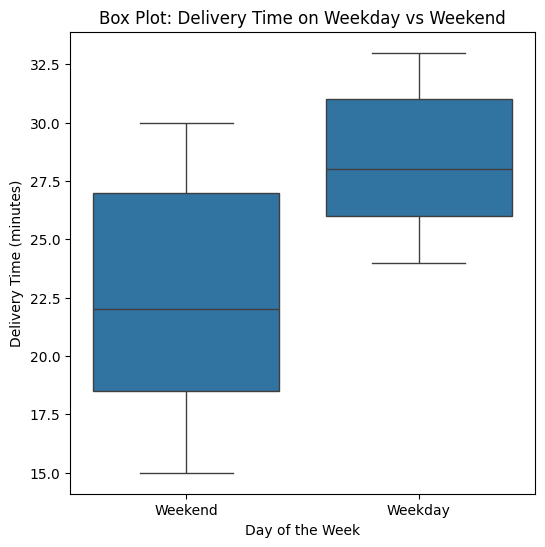

'Average difference: 5.87 minutes'

In [ ]:
# Write the code here
# Calculate the difference in mean delivery times within the plot

# Calculate mean delivery times for weekdays and weekends directly before plotting
mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Box Plot: Delivery Time on Weekday vs Weekend')

# Recalculate the difference in mean delivery times based on the current DataFrame
difference = mean_delivery_times['Weekday'] - mean_delivery_times['Weekend']
difference_text = f"Average difference: {difference:.2f} minutes"

plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()
difference_text

Observation: The box plot reflects that delivery times are 5.87 minutes longer on weekdays compared to weekends.

###3.2.5.Cuisine vs. Cost of the Order

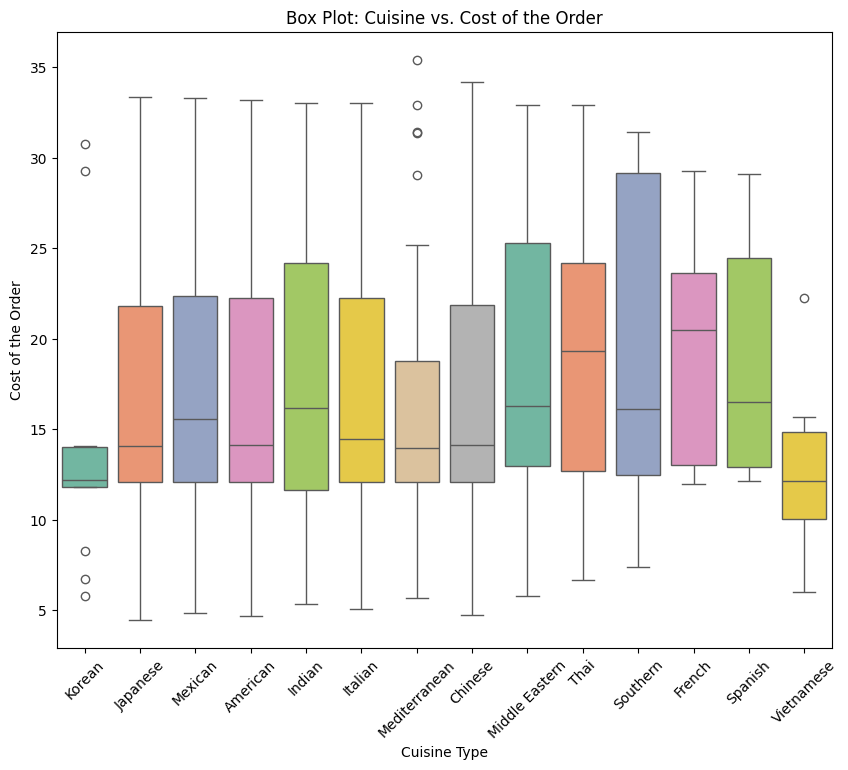

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='Set2')
plt.title('Box Plot: Cuisine vs. Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

**Observation:** The box plot reflects the following:

* **Cuisine with Wide IQR:** The wide interquartile range in American cuisine suggests a significant variation in the cost of American cuisine orders, ranging from budget to premium options.

* **Outliers in Cuisine Costs:** While most Japanese cuisine orders fall below this cost, there are several orders that are significantly more expensive, likely due to premium dishes or large orders.

* **Cuisine with Low Price Variation:** Thai cuisine might have an even distribution on both sides of the median, suggesting a relatively consistent pricing structure for Thai food orders, with less variation in cost compared to other cuisines.

* **Cuisine with High Median Cost:** A high median cost (for example, $20 in the above chart) would indicate that the central tendency leans towards a higher price point compared to cuisines with lower medians.

###3.2.6.Food preparation time by cuisine type

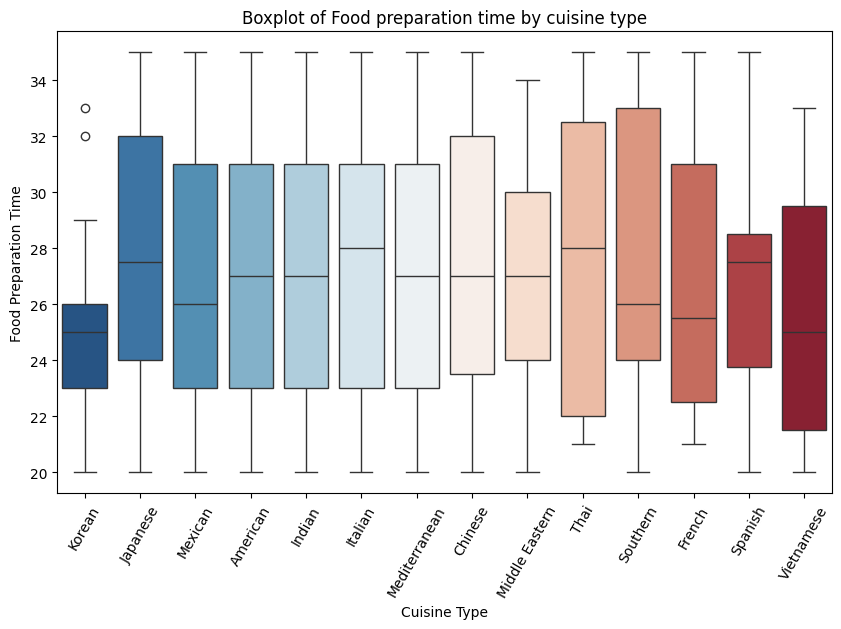

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(10,6))

#Creating Boxplot with food preparation time by cuisine time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'RdBu_r')

# Set labels and title
plt.xticks(rotation = 60)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Boxplot of Food preparation time by cuisine type')
plt.show()

**Observation:** The box plot reflects the following:

* **Variability in Preparation Time:** The box plot illustrates significant variability in food preparation times across different cuisine types, with wider interquartile ranges (IQR) indicating greater variability, and compact IQRs suggesting consistency.

* **Presence of Outliers:** The plot displays outliers for several cuisine types, as indicated by points falling outside the "whiskers", representing unusually high or low preparation times.

* **Median Preparation Times:** The median preparation time varies significantly across cuisines, reflecting inherent differences in cooking techniques, ingredient preparation, and complexity among the different cuisine types.

###3.2.7.Relationship between rating and delivery time

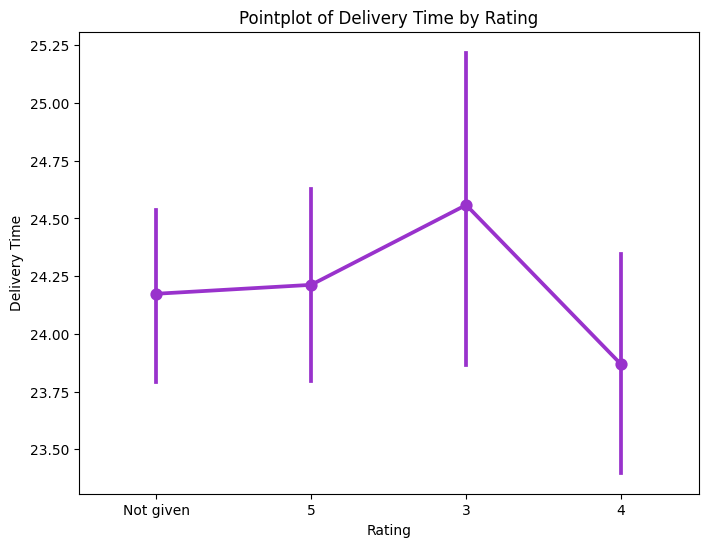

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(8, 6))

# Creating pointplot
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, color = 'darkorchid')

# Setting labels and titles
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Pointplot of Delivery Time by Rating')

plt.show()

**Observations**

* **Tolerance at High Satisfaction:** Customers may tolerate slightly longer delivery times and still give 5-star experiences, prioritizing quality and service over speed, as evident by more delivery time than 4 star rating.

* **Non-linear Relationship:** A non-linear relationship exists between delivery time and ratings, indicating other factors significantly influence high satisfaction.

* **Expectation Management:** An effective management of client expectations can lead to higher ratings, even with slightly longer wait times.

###3.2.8.Cost of Orders by Rating

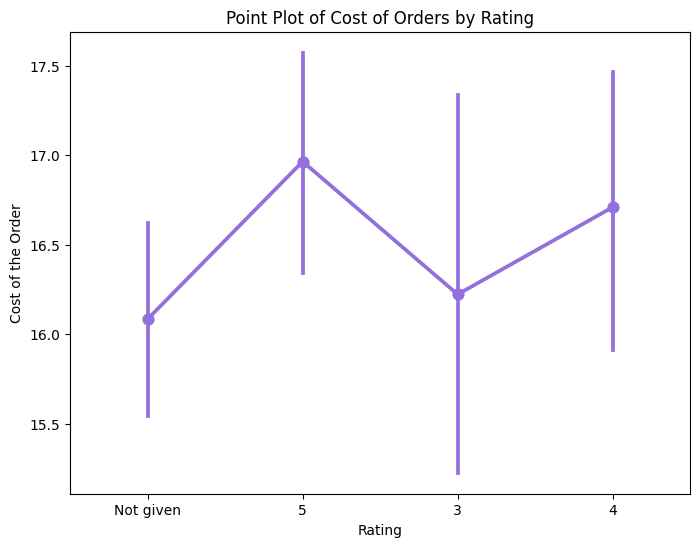

In [ ]:
# Create a figure with the specified figure size
plt.figure(figsize=(8, 6))

# Create a pointplot to visualize the relationship between rating and cost of orders
sns.pointplot(data=df, x='rating', y='cost_of_the_order', color = 'mediumpurple')

# Customize plot labels and title for better readability
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Cost of the Order')  # Y-axis label
plt.title('Point Plot of Cost of Orders by Rating')  # Plot title

# Show the plot
plt.show()

**Observations**

* **Higher Ratings with Varied Cost:** The plot illustrates customer satisfaction across a range of order values, connecting the categories to illustrate their trend across all ratings.

* **Consistent Spending Across High Ratings:** The data indicate that customer satisfaction is achievable without necessarily increasing spending, as reflected in the distribution and shape of the data.

**Observation:**
The overall distribution in box plot is same.



###3.2.9.Plot the heatmap

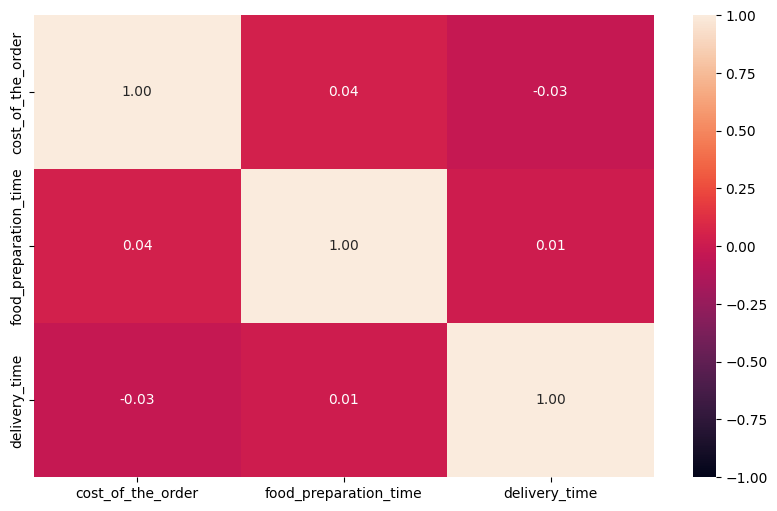

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

**Observation:** The heatmap suggests that there are no strong correlations between the cost of the order, the food preparation time, and the delivery time for this dataset.

* The correlation coefficient between 'cost_of_the_order' and 'food_preparation_time' is 0.04, indicating a very weak positive correlation, suggesting that there is hardly any relationship between them.

* The correlation coefficient between 'cost_of_the_order' and 'delivery_time' is -0.03, indicating a very weak negative correlation, suggesting no significant relationship between them.

* The correlation coefficient between 'food_preparation_time' and 'delivery_time' is 0.01, also indicating a very weak positive correlation, suggesting no strong relationship between them.

#4.Data Analysis

### **Question 1**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants in terms of the number of orders received:")
display(top_restaurants)

Top 5 restaurants in terms of the number of orders received:


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations**: Top 5 restaurants with orders received are:
1. Shake Shack with 219 orders.
2. The Meatball Shop with 132 orders.
3. Blue Ribbon Sushi with 119 orders.
4. Blue Ribbon Fried Chicken with 96 orders.
5. Parm with 68 orders.



### **Question 2**: Which is the most popular cuisine on weekends?

In [ ]:
# Filter the data for orders placed on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine_weekend)

The most popular cuisine on weekends is: American


**Observations**: The most popular cusine is American

### **Question 3**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Count the number of orders that cost more than 20 dollars
orders_over_20 = df[df['cost_of_the_order'] > 20]['order_id'].count()

# Calculate the total number of orders
total_orders = df['order_id'].count()

# Calculate the percentage of orders that cost more than 20 dollars
percentage_orders_over_20 = (orders_over_20 / total_orders) * 100

print("Percentage of orders that cost more than 20 dollars:", percentage_orders_over_20)

Percentage of orders that cost more than 20 dollars: 29.24130663856691


**Observations**: The  orders that cost more than 20 dollars are 29.24%


### **Question 4**: What is the mean order delivery time?

In [ ]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time:", mean_delivery_time, "minutes")

Mean order delivery time: 24.161749209694417 minutes


**Observations**: The mean order delivery time is 24.16 minutes


### **Question 5:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers and their number of orders:")
print(top_customers)

Top 3 most frequent customers and their number of orders:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


**Observation:**The top 3 most frequent customers and their number of orders are:
* 52832 with 13 orders,
* 47440 with 10 orders, and
* 83287 with 9 orders.

### **Question 6:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Replace 'Not given' with NaN in the 'rating' column
df['rating'] = df['rating'].replace('Not given', np.nan)

# Convert 'rating' column to numeric data type
df['rating'] = pd.to_numeric(df['rating'])

# Calculate rating count and average rating for each restaurant
restaurant_rating_info = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants fulfilling the criteria
eligible_restaurants = restaurant_rating_info[(restaurant_rating_info['count'] > 50) & (restaurant_rating_info['mean'] > 4)]

print("Restaurants eligible for the promotional offer:")
display(eligible_restaurants)

Restaurants eligible for the promotional offer:


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


**Observations:**
The restaurants meeting the criteria are:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop

### **Question 7:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
# Calculate revenue generated from orders based on commission rates
revenue_25_percent = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
revenue_15_percent = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate total revenue generated
total_revenue = revenue_25_percent + revenue_15_percent

print("Net revenue generated by the company across all orders:", total_revenue)

Net revenue generated by the company across all orders: 6166.303


**Observations**: Net revenue generated by the company across all orders is $6166.303


### **Question 8:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered).

In [ ]:
# Write the code here
# Calculate total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders that take more than 60 minutes
orders_over_60_minutes = df[df['total_time'] > 60]['order_id'].count()
total_orders = df['order_id'].count()
percentage_orders_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print("Percentage of orders that take more than 60 minutes to get delivered:", percentage_orders_over_60_minutes)

Percentage of orders that take more than 60 minutes to get delivered: 10.537407797681771


**Observations**: Percentage of orders that take more than 60 minutes to get delivered are 10.54%


### **Question 9:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
# Calculate mean delivery time for weekdays and weekends
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print("Mean delivery time during weekdays:", mean_delivery_time_weekday, "minutes")
print("Mean delivery time during weekends:", mean_delivery_time_weekend, "minutes")

Mean delivery time during weekdays: 28.340036563071298 minutes
Mean delivery time during weekends: 22.4700222057735 minutes


**Observations**: The Mean delivery time during weekdays and weekends are 28.34 and 22.47 minutes


### **Question 10:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

#5.Conclusions:
* Order costs range from 4.47 to 35.41, with a mean of 16.50 and a standard deviation of 7.48. The distribution is skewed towards the right.
* Food preparation time ranges from 20 minutes to 35 minutes, with a mean of 27.37 and a standard deviation of 4.63. The distribution of food preparation time is roughly uniform.
* Delivery time ranges from 15 minutes to 33 minutes, with a mean of 24.16 and a standard deviation of 4.97. The delivery time column distribution is skewed to the left.
* The majority of customers (38.78%) did not provide a rating. 30.98% of customers gave a 5-star rating, followed by 20.34% for 4 stars and 9.91% for 3 stars.
* The majority of orders were for American (30.77%), Japanese (24.76%), Italian (15.70%), and Chinese (11.33%) cuisines, accounting for 82.56% of all orders.
* Online orders were more common on weekends, accounting for 71.18% of orders compared to 28.82% on weekdays.
* The average number of orders was lower for cuisines with higher order costs and vice versa.
* Weekdays have a considerably greater mean delivery time (28.34 minutes) than weekends (22.47 minutes), as well as their median (28 minutes on weekdays, 22 minutes on weekends).

#6.Recommendations:

* Encourage Customers to Give Ratings/Feedback: Offer incentives for leaving ratings and feedback to improve understanding of customer preferences.

* Promotional Offers: Implement weekday promotions and special deals to boost sales, focusing on popular cuisines.

* Improve Delivery Time: Take steps to reduce delivery times, particularly on weekdays, to enhance customer satisfaction.

* Implement Loyalty Programs: Introduce loyalty programs to incentivize repeat business and foster customer loyalty.

* Menu Reconstruction: Review menus and offer discounts on expensive items to gauge customer interest and address pricing concerns.

* Monitor Changes Based on Data: Use statistical analysis to measure the impact of implemented solutions and make data-driven decisions for continuous improvement.

In [ ]:
!jupyter nbconvert --to html FDS_Project_LearnerNotebook_FullCode_ipynb_\(completed\).ipynb

[NbConvertApp] Converting notebook FDS_Project_LearnerNotebook_FullCode_ipynb_(completed).ipynb to html
[NbConvertApp] Writing 1347918 bytes to FDS_Project_LearnerNotebook_FullCode_ipynb_(completed).html
